<a href="https://colab.research.google.com/github/rpbenatti/Data-Science/blob/master/linear_regression_in_python_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # A beginner’s guide to Linear Regression in Python with Scikit-Learn
   
   Ref.:
   https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

## Simple Linear Regression

While exploring the Aerial Bombing Operations of World War Two dataset and recalling that the D-Day landings were nearly postponed due to poor weather, I downloaded these weather reports from the period to compare with missions in the bombing operations dataset.

You can download the dataset from https://drive.google.com/open?id=1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1.

In [0]:
# Import all the required libraries

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
dataset = pd.read_csv('Weather.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# checking the number of rows and columns in our datasets.

dataset.shape

(119040, 31)

In [0]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,119040.0,29659.435795,20953.209402,10001.000000,11801.000000,22508.000000,33501.000000,82506.000000
WindGustSpd,532.0,37.774534,10.297808,18.520000,29.632000,37.040000,43.059000,75.932000
MaxTemp,119040.0,27.045111,8.717817,-33.333333,25.555556,29.444444,31.666667,50.000000
MinTemp,119040.0,17.789511,8.334572,-38.333333,15.000000,21.111111,23.333333,34.444444
MeanTemp,119040.0,22.411631,8.297982,-35.555556,20.555556,25.555556,27.222222,40.000000
YR,119040.0,43.805284,1.136718,40.000000,43.000000,44.000000,45.000000,45.000000
MO,119040.0,6.726016,3.425561,1.000000,4.000000,7.000000,10.000000,12.000000
DA,119040.0,15.797530,8.794541,1.000000,8.000000,16.000000,23.000000,31.000000
DR,533.0,26.998124,15.221732,2.000000,11.000000,32.000000,34.000000,78.000000
SPD,532.0,20.396617,5.560371,10.000000,16.000000,20.000000,23.250000,41.000000


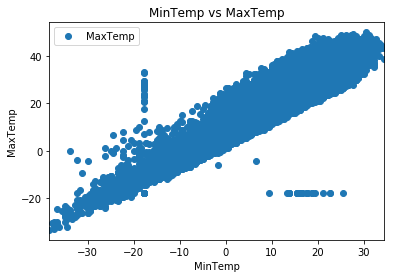

In [0]:
# let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship
# between the data. We have taken MinTemp and MaxTemp for doing our analysis.
# Below is a 2-D graph between MinTemp and MaxTemp.

dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

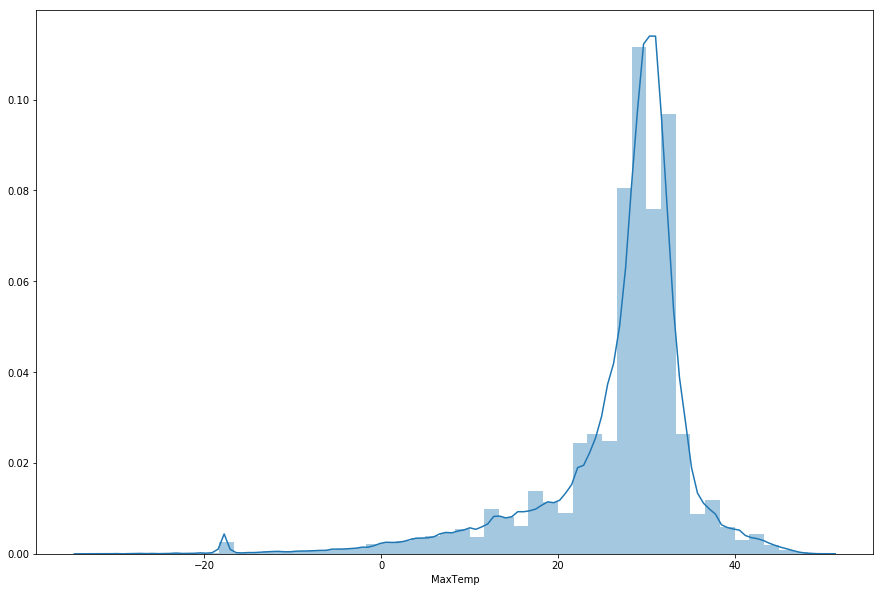

In [0]:
# Let’s check the average max temperature and once we plot it, we can observe that 
# the Average Maximum Temperature is Between Nearly 25 and 35.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [0]:
# Our next step is to divide the data into “attributes” and “labels”.
# Attributes are the independent variables while labels are dependent variables whose values are to be predicted.
# In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded.
# Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, 
# and the label will be the “MaxTemp” column which is stored in y variable.

X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [0]:
print(X)

[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]


In [0]:
print(y)

[[25.55555556]
 [28.88888889]
 [26.11111111]
 ...
 [28.33333333]
 [28.33333333]
 [29.44444444]]


In [0]:
# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
# The test_size variable is where we actually specify the proportion of the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# After splitting the data into training and testing sets, finally, the time is to train our algorithm.
# For that, we need to
# import LinearRegression class, 
# instantiate it, 
# and call the fit() method along with our training data.

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# To retrieve the intercept:

print(regressor.intercept_)

#For retrieving the slope:

print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [0]:
# Now that we have trained our algorithm, it’s time to make some predictions. 
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 
# To make predictions on the test data, execute the following script:

y_pred = regressor.predict(X_test)

In [0]:
# Now compare the actual output values for X_test with the predicted values, execute the following script:

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
5,37.222222,30.602551
6,22.222222,11.684452
7,35.555556,33.670351
8,30.555556,30.602551
9,28.888889,32.647751


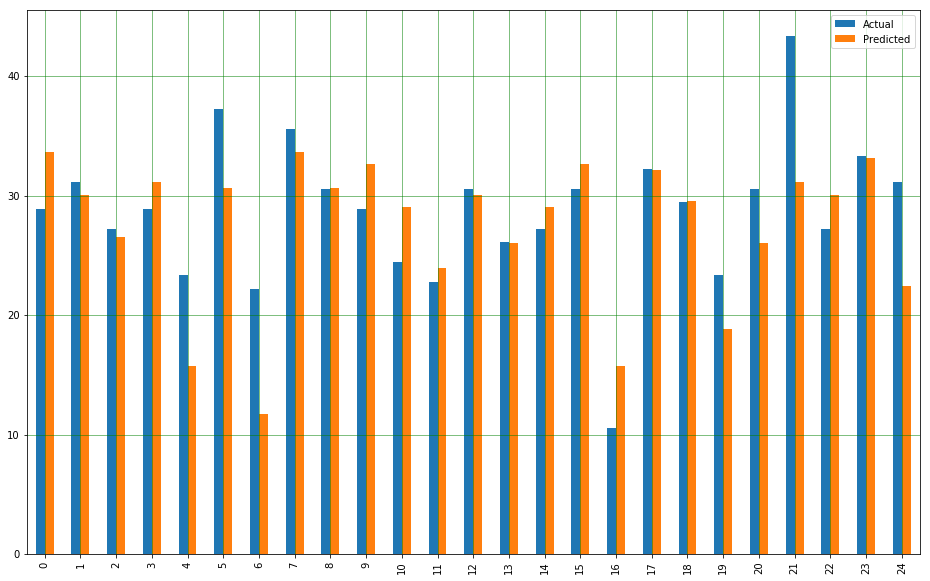

In [0]:
# We can also visualize comparison result as a bar graph using the below script :
# Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

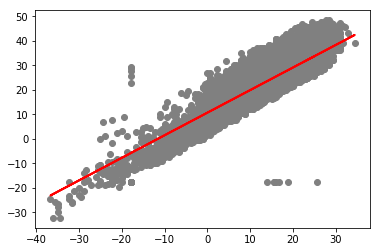

In [0]:
# Though our model is not very precise, the predicted percentages are close to the actual ones.
# Let's plot our straight line with the test data :

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [0]:
# The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm.
This step is particularly important to compare how well different algorithms perform on a particular dataset.
For regression algorithms, three evaluation metrics are commonly used:
    
- Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

$$MAE = \frac{1}{n} \sum_{i}^{n} \left | y_i - \hat{y}_i  \right |$$

- Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

$$MSE = \frac{1}{n} \sum_{i}^{n} (y_i - \hat{y}_i)^{2}$$

- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$RMSE = \sqrt{\frac{1}{n} \sum_{i}^{n} (y_i - \hat{y}_i)^{2}}$$

In [0]:
# Let’s find the values for these metrics using our test data.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


Conclusion:
    
You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

## Multiple Linear Regression

We just performed linear regression in the above section involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called “multiple linear regression” or multivariate linear regression. The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In this section, I have downloaded red wine quality dataset. The dataset related to red variants of the Portuguese “Vinho Verde” wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

You can download the dataset from https://drive.google.com/open?id=195gkZ5cTZL11L308MHc7EyBbAoiB4xqf

We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will predict the quality of the wine.

In [0]:
# Import all the required libraries

In [0]:
dataset = pd.read_csv('winequality.csv')

In [0]:
# checking the number of rows and columns in our datasets.

dataset.shape

(1599, 12)

In [0]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [0]:
# Let us clean our data little bit, So first check which are the columns the contains NaN values in it :

dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Once the above code is executed, all the columns should give False, In case for any column you find True result, then remove all the null values from that column using below code.

In [0]:
dataset = dataset.fillna(method='ffill')

In [0]:
# Our next step is to divide the data into “attributes” and “labels”.
# X variable contains all the attributes/features and y variable contains labels.

X = dataset[['fixed acidity', 
             'volatile acidity', 
             'citric acid', 
             'residual sugar', 
             'chlorides', 
             'free sulfur dioxide', 
             'total sulfur dioxide', 
             'density', 
             'pH', 
             'sulphates',
             'alcohol']].values

y = dataset['quality'].values

In [0]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

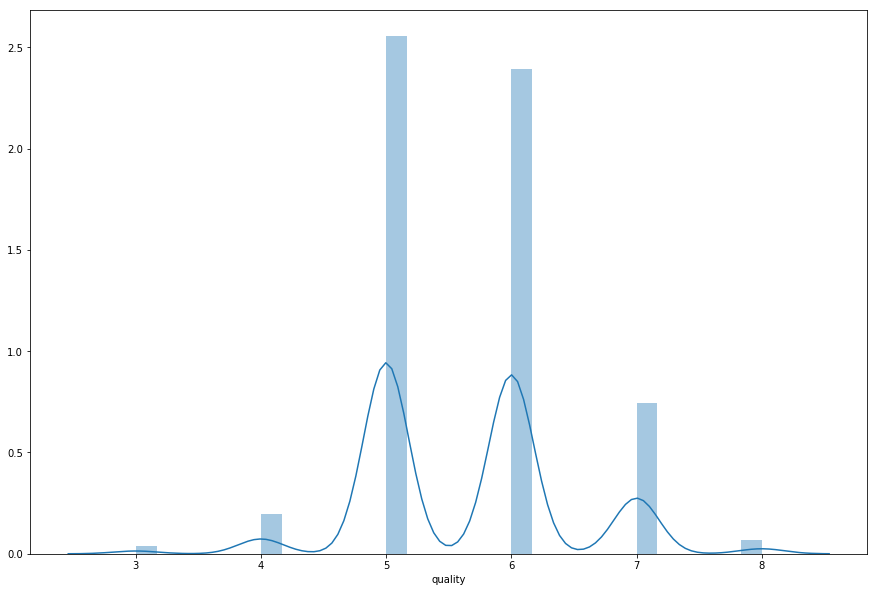

In [0]:
# Let's check the average value of the “quality” column.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

As we can observe that most of the time the value is either 5 or 6.

In [0]:
# Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Now lets train our model.

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# In the case of multivariable linear regression, the regression model has to find the most optimal coefficients
# for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

coeff_df = pd.DataFrame(regressor.coef_, dataset.columns.drop('quality'), columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

In [0]:
# Now let's do prediction on test data.

y_pred = regressor.predict(X_test)

In [0]:
# Check the difference between the actual value and predicted value.

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


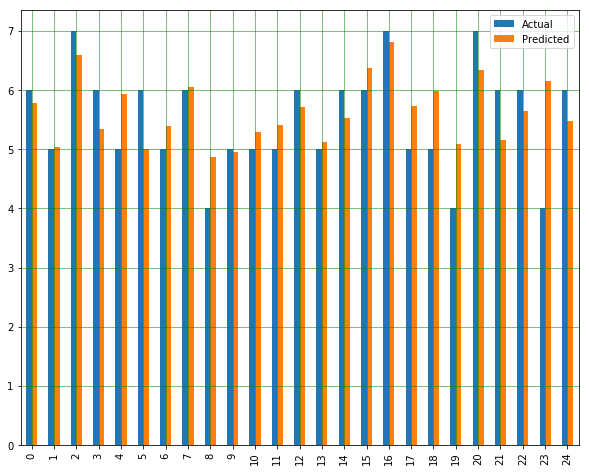

In [0]:
# Now let's plot the comparison of Actual and Predicted values

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

As we can observe here that our model has returned pretty good prediction results.

The final step is to evaluate the performance of the algorithm. We’ll do this by finding the values for MAE, MSE, and RMSE. Execute the following script:

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611016
Mean Squared Error: 0.3844711978201237
Root Mean Squared Error: 0.6200574149384263


You can see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

- **Need more data:** We need to have a huge amount of data to get the best possible prediction.
- **Bad assumptions:** We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
- **Poor features:** The features we used may not have had a high enough correlation to the values we were trying to predict.

Conclusion:

In this article, we studied the most fundamental machine learning algorithms i.e. linear regression. We implemented both simple linear regression and multiple linear regression with the help of the Scikit-Learn machine learning library.